In [1]:
# Numpy
import numpy as np

# OpenCV is a computer vision library
import cv2 as cv

# Library for plotting
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt




In [5]:
# Draw the raw map
map = cv.imread('map.pgm')
# image = cv.imread('tempmap3.pgm', cv.IMREAD_GRAYSCALE)
map[map>0] = 255
plt.imshow(map)
print(map.shape)


(384, 384, 3)


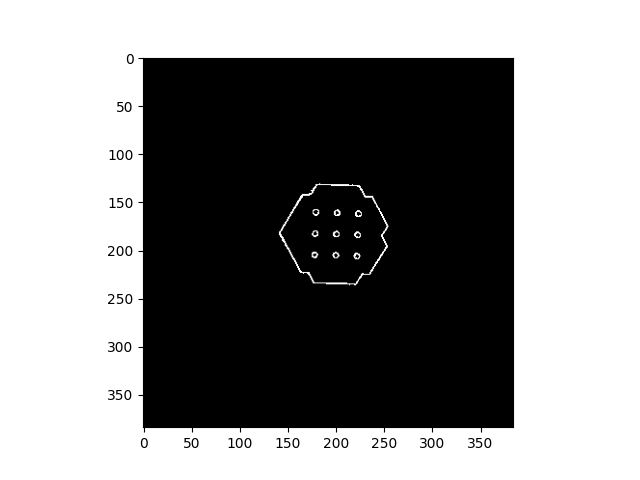

In [8]:
# We need to modify the image before we can detect thingsWe need to make sure that circles are closed
# so we are going to add some blurring

map_gray = 255-cv.cvtColor(map,cv.COLOR_BGR2GRAY)
plt.imshow(map_gray, cmap="gray")

#map_blurred = cv.medianBlur(map_gray,1)
#plt.imshow(map_blurred, cmap="gray")
#map_blurred.shape

plt.show()



[[[177.5 204.5   3.3]
  [199.5 205.5   3.3]
  [200.5 161.5   3.3]
  [178.5 182.5   3.3]
  [221.5 206.5   3.3]
  [178.5 160.5   3.3]
  [200.5 183.5   3.3]
  [222.5 184.5   3.3]
  [223.5 162.5   3.3]]]
(1, 9, 3)


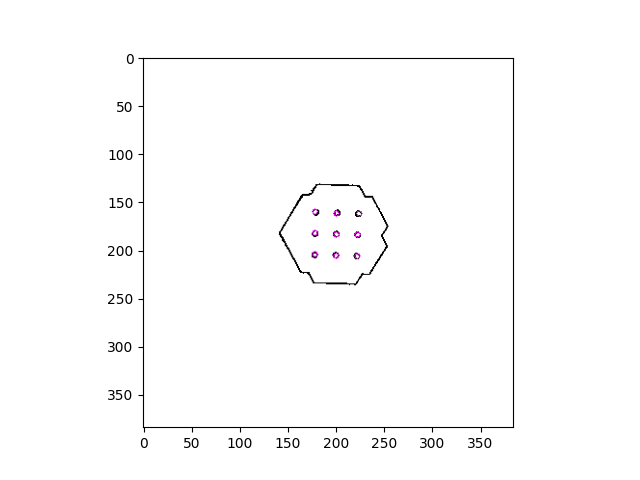

In [15]:
# METHOD 1 - Using the hough transform to find circles
#   Caveats: You have to adjust the parameters to match your problem. param1 and param2 are particularly tricky.
circles = cv.HoughCircles(map_gray,cv.HOUGH_GRADIENT,dp=1, minDist=15,
                            param1=50,param2=7.9,minRadius=2,maxRadius=4)
print(circles)
print(circles.shape)

outimg = map.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle outline
        radius = i[2]
        if radius > 2 and radius < 40:
            cv.circle(outimg, center, radius, (255, 0, 255), 1)
plt.imshow(outimg)
plt.show()

In [16]:
# METHOD 2 - 2D Convolutions
r = 3
kernel = np.zeros((9,9))
cv.circle(kernel, (4,4), r, 255, 1)
kernel = kernel.astype(float)
print(kernel)

map_grayf = map_gray.astype(float)
imgc = cv.filter2D(src=map_grayf, ddepth=-1, kernel=kernel)

imgc_scaled = (imgc/np.max(imgc))*255
imgc_thresh = imgc_scaled>0.6*np.max(imgc_scaled)
# plt.imshow(imgc_scaled,cmap='gray')

plt.imshow(imgc_thresh,cmap='gray')

np.max(imgc)




[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0. 255. 255.   0. 255. 255.   0.   0.]
 [  0.   0. 255.   0.   0.   0. 255.   0.   0.]
 [  0. 255.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0. 255.   0.   0.]
 [  0.   0. 255. 255.   0. 255. 255.   0.   0.]
 [  0.   0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]


1040399.9999999995

255.0


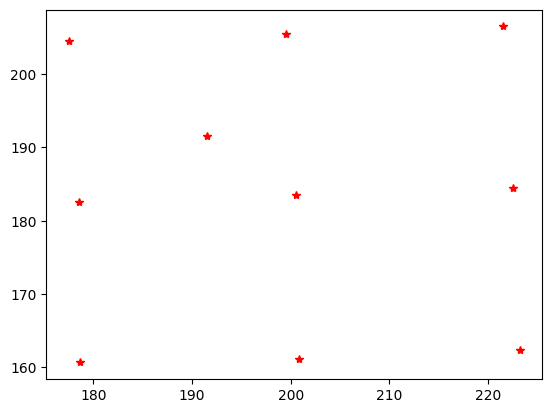

In [10]:
print(np.max(imgc_scaled))
mask = imgc_thresh.astype(np.uint8)

ret, thresh = cv.threshold(mask,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
output = cv.connectedComponentsWithStats(mask)
(numLabels, labels, stats, centroids) = output
plt.plot(centroids[:,0], centroids[:,1],'r*')

In [77]:
centroids

array([[191.28790609, 191.71400043],
       [199.39669739, 183.30337942],
       [179.        , 160.73643411],
       [201.03149606, 161.35433071],
       [223.        , 162.26356589],
       [178.312     , 182.944     ],
       [200.03149606, 183.35433071],
       [222.136     , 184.136     ],
       [177.688     , 204.88      ],
       [199.59677419, 205.20967742],
       [221.45967742, 206.08870968]])